In [1]:
import wooldridge

In [2]:
df = wooldridge.data('mroz')

# Teoria - Modelo de Regressão Linear (Linear Regression Model LRM)

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


In [5]:
df.shape

(753, 22)

In [6]:
df = df.dropna()

In [7]:
df.columns.tolist()

['inlf',
 'hours',
 'kidslt6',
 'kidsge6',
 'age',
 'educ',
 'wage',
 'repwage',
 'hushrs',
 'husage',
 'huseduc',
 'huswage',
 'faminc',
 'mtr',
 'motheduc',
 'fatheduc',
 'unem',
 'city',
 'exper',
 'nwifeinc',
 'lwage',
 'expersq']

In [8]:
import statsmodels.api as sm

In [9]:
y = df['lwage']
x = df['educ']

In [10]:
x = sm.add_constant(data=x)

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
ols_regression = sm.OLS(endog=y, exog=x).fit()

In [12]:
ols_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     56.93
Date:                Wed, 25 May 2022   Prob (F-statistic):           2.76e-13
Time:                        16:42:06   Log-Likelihood:                -441.26
No. Observations:                 428   AIC:                             886.5
Df Residuals:                     426   BIC:                             894.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1852      0.185     -1.000      0.318      -0.549       0.179
educ           0.1086      0.014      7.545      0.000       0.080       0.137
==============================================================================
Omnibus:                       91.833   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.790
Skew:                          -0.956   Prob(JB):                     1.08e-66
Kurtosis:                       6.658   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y_fitted = ols_regression.fittedvalues

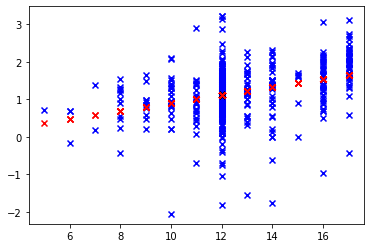

In [14]:
plt.scatter(x['educ'],y, c='b', marker='x', label='Original Values')
plt.scatter(x['educ'], y_fitted, c='r', marker='x', label='Fitted Values')
plt.show()

In [15]:
ols_regression.resid

0      0.091567
1     -0.790075
2      0.395551
3     -1.026464
4      0.188388
         ...   
423   -0.063263
424    0.550270
425    0.542193
426    0.107861
427    0.287902
Length: 428, dtype: float64

In [16]:
round(sum(ols_regression.resid),5)

0.0

In [17]:
ols_regression.ssr

197.0010216102181

In [18]:
ols_regression.ess

26.32641928189122

In [19]:
ols_regression.centered_tss

223.3274408921093

In [20]:
ols_regression.ssr+ols_regression.ess

223.3274408921093

In [21]:
import scipy.stats as st

In [22]:
st.norm.cdf(9)

1.0

# Variáveis Aleatórias (Utilizados também para se adquirir valores de distribuições)

In [23]:
import sympy as sp
from sympy.plotting import plot

In [24]:
sp.pi

pi

In [25]:
x = sp.symbols('x')
func = 1/sp.sqrt(2*sp.pi)*sp.exp((-x**2)/2)
func

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

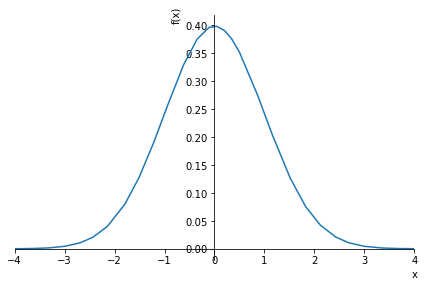

In [26]:
p1 = plot(func, show=True, xlim=(-4, 4))

In [27]:
st.norm.ppf(0.05)

-1.6448536269514729

In [28]:
st.norm.rvs()

-0.44147157622171534

In [29]:
# yi = B1+B2xi+ei

In [30]:
import numpy as np

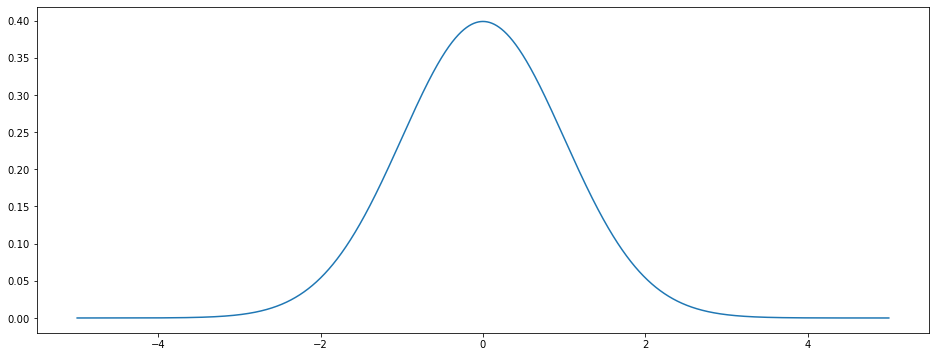

In [31]:
x = np.linspace(-5, 5, 10000)
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, st.norm.pdf(x, 0, 1))
plt.show()

In [32]:
#Era isso q eu queria
x_rvs = st.norm.rvs(loc=0, scale=1, size=10000)

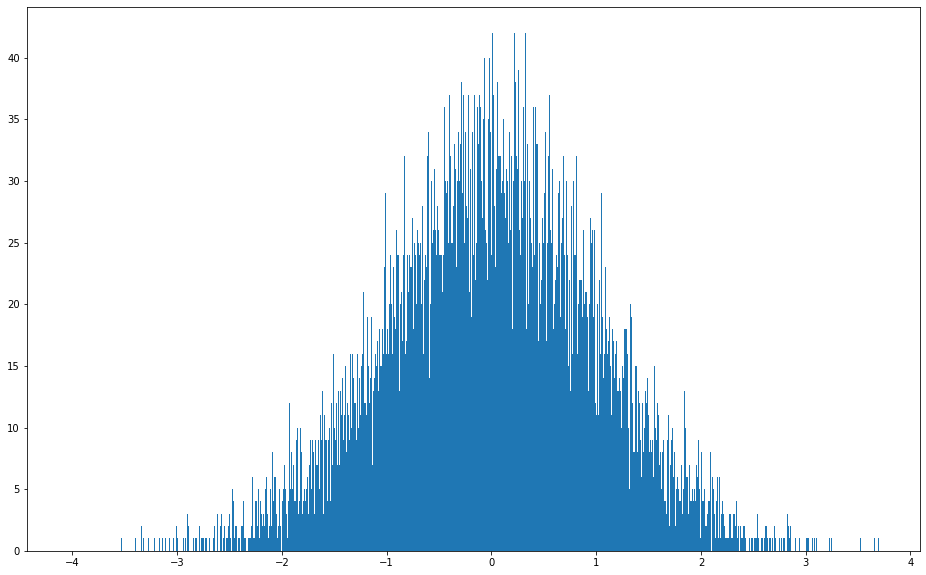

In [33]:


fig, ax = plt.subplots(figsize=(16,10))
ax.hist(x_rvs,bins=1000)
plt.show()

In [34]:
counts = np.random.normal(loc=0, scale=1, size=10000)


<function matplotlib.pyplot.show(close=None, block=None)>

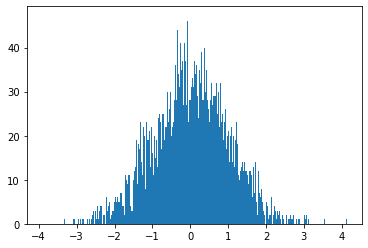

In [35]:
plt.hist(counts, bins=1000)
plt.show

# Teste de Chow : A Chow test is used to test whether the coefficients in two different regression models on different datasets are equal.

In [36]:
# Teste de Chow :
# A Chow test is used to test whether the coefficients in two different regression models on different datasets are equal.
import pandas as pd
df = pd.DataFrame({'x': [1, 1, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 10, 10,
                         11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20],
                   'y': [3, 5, 6, 10, 13, 15, 17, 14, 20, 23, 25, 27, 30, 30, 31,
                         33, 32, 32, 30, 32, 34, 34, 37, 35, 34, 36, 34, 37, 38, 36]})

In [37]:
df.head()

,x,y
0,1,3
1,1,5
2,2,6
3,3,10
4,4,13


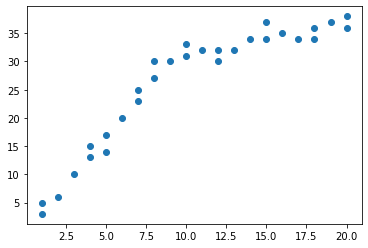

In [38]:
plt.plot(df.x, df.y, 'o')

In [39]:
import chow_test
chow_test.chow_test(X_series=df[['x']],y_series=df['y'],last_index=15,first_index=16,significance=.05)


Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 113.81778458845861, P_value: 2.773337115513641e-13


(113.81778458845861, 2.773337115513641e-13)

# Teste de White e Correção Robusta de White

In [40]:
# Correção robusta de white para erros padrões

# White’s test is used to determine if heteroscedasticity is present in a regression model.

# Heteroscedasticity refers to the unequal scatter of residuals at different levels of a 
# response variable, which violates the assumption that the residuals are equally scattered at 
# each level of the response variable.
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"
data = pd.read_csv(url)

In [41]:
y = data['mpg']

In [42]:
x = data[['disp', 'hp']]

In [43]:
x = sm.add_constant(data=x)

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
ols_regression = sm.OLS(endog=y, exog=x).fit()
ols_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     43.09
Date:                Wed, 25 May 2022   Prob (F-statistic):           2.06e-09
Time:                        16:42:13   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7359      1.332     23.083      0.000      28.013      33.459
disp          -0.0303      0.007     -4.098      0.000      -0.045      -0.015
hp            -0.0248      0.013     -1.856      0.074      -0.052       0.003
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import statsmodels.stats.diagnostic as smd

In [46]:
white_test = smd.het_white(ols_regression.resid, ols_regression.model.exog)
white_test

(7.0766203304166915,
 0.21500404394263434,
 1.4764621093132035,
 0.23147065943879158)

In [47]:
# a função não vem com as labels (por algum motivo) então por isso tem essa variável aqui, pra ficar legível
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 7.0766203304166915, 'Test Statistic p-value': 0.21500404394263434, 'F-Statistic': 1.4764621093132035, 'F-Test p-value': 0.23147065943879158}


Temos como hipótese nula a homocedasticidade, e hipótese alternativa a heterocedasticidade. Nesse caso, o p-valor foi de 0.21, ou seja, não rejeitamos hipótese nula de homocedasticidade. Supondo que a rejeitassemos, poderiamos fazer a correção robusta de white da maneira a seguir.

In [48]:
ols_regression_white = sm.OLS(endog=y, exog=x).fit(cov_type='HC3')
ols_regression_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     34.62
Date:                Wed, 25 May 2022   Prob (F-statistic):           2.07e-08
Time:                        16:42:13   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7359      1.593     19.293      0.000      27.613      33.858
disp          -0.0303      0.008     -3.817      0.000      -0.046      -0.015
hp            -0.0248      0.013     -1.881      0.060      -0.051       0.001
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

# Teste de Breusch-Pagan-Godfrey para identificação de heterocedasticidade

In [49]:
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [50]:
y = df['rating']
x = sm.add_constant(df[['points', 'assists', 'rebounds']])

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
ols_regression = sm.OLS(endog=y, exog=x).fit()
ols_regression.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Wed, 25 May 2022   Prob (F-statistic):             0.0995
Time:                        16:42:13   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4716     14.588      4.282      0.005      26.776      98.168
points         1.1193      0.411      2.724      0.034       0.114       2.125
assists        0.8834      1.381      0.640      0.546      -2.495       4.262
rebounds      -0.4278      0.851     -0.503      0.633      -2.510       1.655
==============================================================================
Omnibus:                        2.711   Durbin-Watson:                   2.392
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                0.945
Skew:                          -0.751   Prob(JB):                        0.624
Kurtosis:                       3.115   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
BP_test = smd.het_breuschpagan(ols_regression.resid, ols_regression.model.exog)

In [53]:
print(dict(zip(names, BP_test)))

{'Lagrange multiplier statistic': 6.003951995818753, 'p-value': 0.11141811013398045, 'f-value': 3.004944880310017, 'f p-value': 0.11663863538252693}


The null hypothesis (H0): Homoscedasticity is present.

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In this example, the Lagrange multiplier statistic for the test is 6.004 and the corresponding p-value is 0.1114. Because this p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

# WLS (Weighted Leasts Squares) utilizado para tratamento de heterocedasticidade

A teoria por detrás de WLS é um pouco complexa e sua aplicabilidade é situacional, por isso a ausência de exemplos concretos aqui.

# Erros de Medição (Measurement Errors)

# Endogeneidade

## Simultaneos Equations Bias
y1 = b1 + b2 * y2 + b3 * x1 + b4 * x2 + ei1<br>
y2 = g1 + g2 * y1 + g3 * x1 + g4 * x2 + ei2

^^^^ Forma Estrutural<br>
Nesse caso substituimos y2 pela sua equação de estimação em y1, achamos y1 e substituimos o mesmo na equação de y2, essa seria a forma "reduzida"<br>
y1 = b1 + b2 * (g1 + g2 * y1 + g3 * x1 + g4 * x2 + ei2) + b3 * x1 + b4 * x2 + ei1
<br>
Importante ressaltar que nesse caso existe correlação entre ambos os termos de erro e a variável dependente


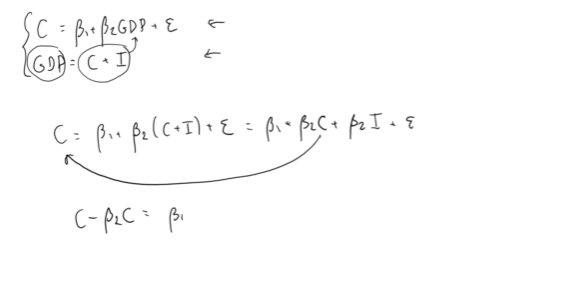

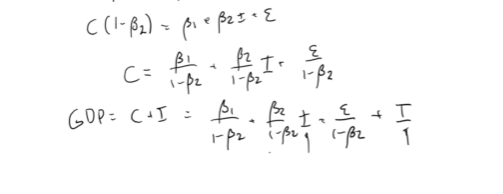

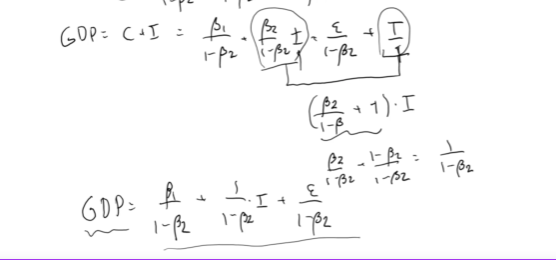

# IV (variável instrumental) - 2SLS (Two Stage Least Squares): Utilizada com variáveis instrumentais para quando existe alguma variável endógena no modelo

In [54]:
from statsmodels.sandbox.regression.gmm import IV2SLS

df = wooldridge.data('wage2')

In [55]:
df.dropna(inplace=True)

In [56]:
iv_model = IV2SLS(df['lwage'], df[['hours', 'educ']], df[['hours', 'meduc']]).fit()
iv_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.983
Model:                         IV2SLS   Adj. R-squared:                  0.983
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 25 May 2022                                         
Time:                        16:42:13                                         
No. Observations:                 663                                         
Df Residuals:                     661                                         
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hours          0.0360      0.006      5.748      0.000       0.024       0.048
educ           0.3779      0.021     18.433      0.000       0.338       0.418
==============================================================================
Omnibus:                       25.346   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.826
Skew:                          -0.452   Prob(JB):                     2.47e-06
Kurtosis:                       2.659   Cond. No.                         16.3
==============================================================================
"""

# Generalized IV Estimator (GIVE)

In [57]:
give_model = IV2SLS(df['lwage'], df[['hours', 'educ']], df[['hours', 'meduc', 'feduc']]).fit()
give_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.984
Model:                         IV2SLS   Adj. R-squared:                  0.984
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 25 May 2022                                         
Time:                        16:42:13                                         
No. Observations:                 663                                         
Df Residuals:                     661                                         
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hours          0.0437      0.006      7.842      0.000       0.033       0.055
educ           0.3525      0.018     19.358      0.000       0.317       0.388
==============================================================================
Omnibus:                       24.227   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.186
Skew:                          -0.479   Prob(JB):                     2.06e-06
Kurtosis:                       2.825   Cond. No.                         16.3
==============================================================================
"""

# Hausman Test for exogeneity (Teste de Hausman para identificação de variáveis exógenas (hipótese nula) e endógenas (hipotese alternativa))

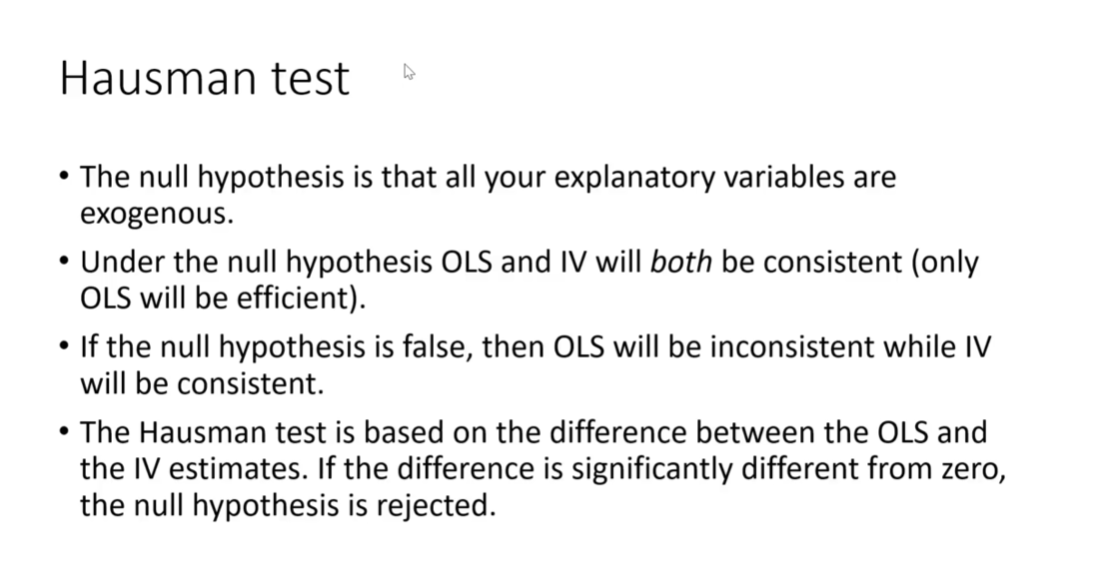

In [58]:
print('Estatística de teste (chi-Square), p-valor e um número do qual eu não faço ideia')
iv_model.spec_hausman()

Estatística de teste (chi-Square), p-valor e um número do qual eu não faço ideia


(33.36296319784846, 7.646641510008848e-09, 1)

# LPM (Linear Probability Model)

In [59]:
df = wooldridge.data('mroz')
df

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,2,40,13,NaN,0.00,3020,43,...,28200.0,0.6215,10,10,9.5,1,5,28.200001,NaN,25
749,0,0,2,3,31,12,NaN,0.00,2056,33,...,10000.0,0.7715,12,12,7.5,0,14,10.000000,NaN,196
750,0,0,0,0,43,12,NaN,0.00,2383,43,...,9952.0,0.7515,10,3,7.5,0,4,9.952000,NaN,16
751,0,0,0,0,60,12,NaN,0.00,1705,55,...,24984.0,0.6215,12,12,14.0,1,15,24.983999,NaN,225


In [60]:
y = df['inlf']
X = df[['nwifeinc', 'educ', 'exper', 'expersq', 'age', 'kidslt6', 'kidsge6']]
X = sm.add_constant(data=X)

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
LPM_regression = sm.OLS(endog=y, exog=X).fit()

In [62]:
LPM_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     38.22
Date:                Wed, 25 May 2022   Prob (F-statistic):           6.90e-46
Time:                        16:42:13   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5855      0.154      3.798      0.000       0.283       0.888
nwifeinc      -0.0034      0.001     -2.351      0.019      -0.006      -0.001
educ           0.0380      0.007      5.151      0.000       0.024       0.052
exper          0.0395      0.006      6.962      0.000       0.028       0.051
expersq       -0.0006      0.000     -3.227      0.001      -0.001      -0.000
age           -0.0161      0.002     -6.476      0.000      -0.021      -0.011
kidslt6       -0.2618      0.034     -7.814      0.000      -0.328      -0.196
kidsge6        0.0130      0.013      0.986      0.324      -0.013       0.039
==============================================================================
Omnibus:                      169.137   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.741
Skew:                          -0.196   Prob(JB):                     1.05e-08
Kurtosis:                       1.991   Cond. No.                     3.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
LPM_regression.fittedvalues

0      0.663612
1      0.700917
2      0.672729
3      0.725744
4      0.561636
         ...   
748    0.548379
749    0.460028
750    0.464099
751    0.449155
752    0.630431
Length: 753, dtype: float64

In [64]:
LPM_regression.fittedvalues.max()

1.1271505344702797

In [65]:
LPM_regression.fittedvalues.min()

-0.3451102629453121

Esses são alguns dos problemas do Linear Probability Model, ele dá probabilidades acima de 1 e abaixo de 0

# Logit e Probit

In [66]:
from statsmodels.discrete.discrete_model import Probit, Logit

In [67]:
probit_model = Probit(endog=y, exog=X).fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.532938
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.2206
Time:                        16:42:13   Log-Likelihood:                -401.30
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 2.009e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2701      0.509      0.531      0.595      -0.727       1.267
nwifeinc      -0.0120      0.005     -2.484      0.013      -0.022      -0.003
educ           0.1309      0.025      5.183      0.000       0.081       0.180
exper          0.1233      0.019      6.590      0.000       0.087       0.160
expersq       -0.0019      0.001     -3.145      0.002      -0.003      -0.001
age           -0.0529      0.008     -6.235      0.000      -0.069      -0.036
kidslt6       -0.8683      0.119     -7.326      0.000      -1.101      -0.636
kidsge6        0.0360      0.043      0.828      0.408      -0.049       0.121
==============================================================================
"""

In [68]:
logit_model = Logit(endog=y, exog=X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.533553
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   inlf   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.2197
Time:                        16:42:13   Log-Likelihood:                -401.77
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 3.159e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4255      0.860      0.494      0.621      -1.261       2.112
nwifeinc      -0.0213      0.008     -2.535      0.011      -0.038      -0.005
educ           0.2212      0.043      5.091      0.000       0.136       0.306
exper          0.2059      0.032      6.422      0.000       0.143       0.269
expersq       -0.0032      0.001     -3.104      0.002      -0.005      -0.001
age           -0.0880      0.015     -6.040      0.000      -0.117      -0.059
kidslt6       -1.4434      0.204     -7.090      0.000      -1.842      -1.044
kidsge6        0.0601      0.075      0.804      0.422      -0.086       0.207
==============================================================================
"""

In [69]:
LPM_regression.fittedvalues[:5].tolist()

[0.66361232233092,
 0.7009165684636817,
 0.6727286208341634,
 0.7257441314492118,
 0.5616358325676263]

In [70]:
# Nesse caso, para ter acesso aos valores reais, é necessário transforma-los pela CDF da Normal Padrão
st.norm.cdf(probit_model.fittedvalues[:5]).tolist()

[0.6939711570302175,
 0.7461622838269366,
 0.6955458950711002,
 0.771061406742004,
 0.5781957808093058]

In [71]:
# Nesse caso, para ter acesso aos valores reais, é necessário transforma-los por uma função logarítimica
(1/(1+np.exp(-logit_model.fittedvalues[:5]))).tolist()

[0.7006624965300192,
 0.7489940847173187,
 0.7020338645956673,
 0.7761773579578806,
 0.5811384593001896]

In [72]:
probit_model_2 = sm.Probit(endog=y, exog=X).fit()
probit_model_2.summary()
st.norm.cdf(probit_model_2.fittedvalues[:5]).tolist()

Optimization terminated successfully.
         Current function value: 0.532938
         Iterations 5


[0.6939711570302175,
 0.7461622838269366,
 0.6955458950711002,
 0.771061406742004,
 0.5781957808093058]

In [73]:
logit_model_2 = sm.Logit(endog=y, exog=X).fit()
logit_model_2.summary()
(1/(1+np.exp(-logit_model_2.fittedvalues[:5]))).tolist()

Optimization terminated successfully.
         Current function value: 0.533553
         Iterations 6


[0.7006624965300192,
 0.7489940847173187,
 0.7020338645956673,
 0.7761773579578806,
 0.5811384593001896]

##### Essa é a forma de se obter o efeito marginal (ou seja, seria a forma correta de se interpretar os Betas)

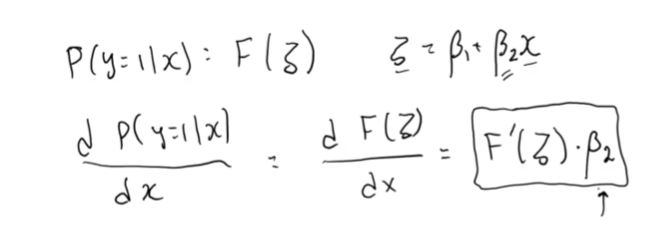

##### Importante ressaltar que nesse caso é possível recuperar o efeito marginal para cada entrada da amostra, utilizando-se das seguintes formulas:
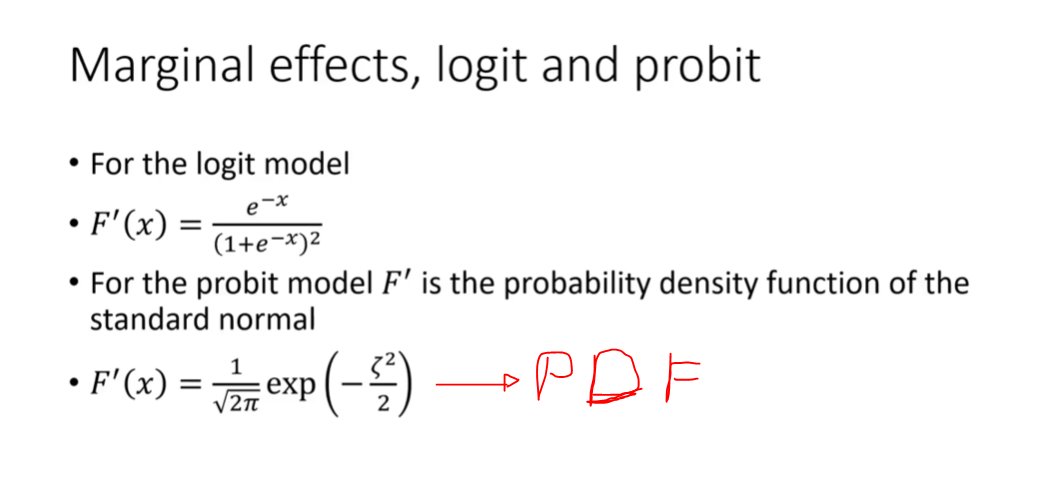

# Time Series (Séries Temporais)

In [74]:
df_ts = wooldridge.data('nyse')

In [75]:
df_ts.shape

(691, 8)

In [76]:
df_ts

,price,return,return_1,t,price_1,price_2,cprice,cprice_1
0,49.750000,NaN,NaN,1,NaN,NaN,NaN,NaN
1,51.439999,3.396982,NaN,2,49.750000,NaN,1.689999,NaN
2,52.049999,1.185849,3.396982,3,51.439999,49.750000,0.610001,1.689999
3,52.279999,0.441882,1.185849,4,52.049999,51.439999,0.230000,0.610001
4,54.240002,3.749049,0.441882,5,52.279999,52.049999,1.960003,0.230000
...,...,...,...,...,...,...,...,...
686,161.740005,-1.106694,-1.004784,687,163.550003,165.210007,-1.809998,-1.660004
687,165.449997,2.293799,-1.106694,688,161.740005,163.550003,3.709991,-1.809998
688,166.669998,0.737384,2.293799,689,165.449997,161.740005,1.220001,3.709991
689,163.410004,-1.955958,0.737384,690,166.669998,165.449997,-3.259995,1.220001


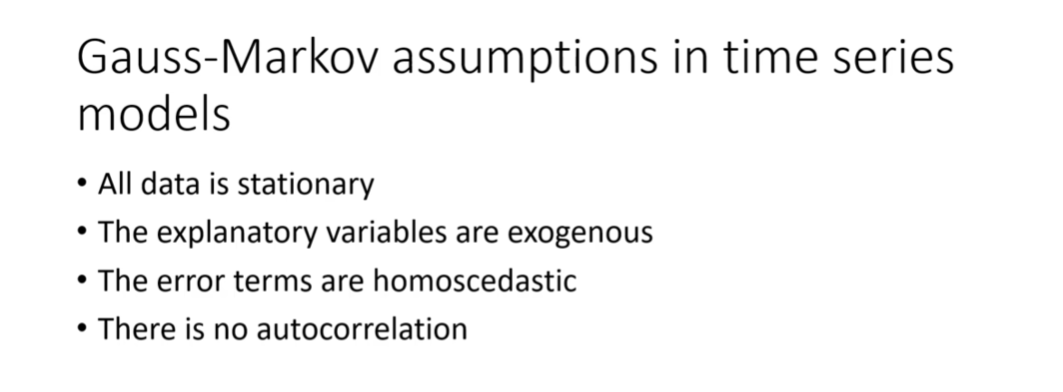

# Static - Time Series (series temporais estáticas)

In [77]:
time = np.arange(1,201)
xi1 = st.norm.rvs(loc=0, scale=1, size=200)
xi2 = st.norm.rvs(loc=0, scale=1, size=200)
eps = st.norm.rvs(loc=0, scale=0.2, size=200)

In [78]:
beta0 = 0
beta1 = 1
beta2 = -1
y = beta0 + beta1*xi1 + beta2*xi2 + eps
y

array([-0.36340333,  0.53145801,  0.12456263,  2.83090901,  0.10881055,
       -0.09083494, -0.09673765,  1.34347039, -0.60961389,  2.11457643,
        0.48983422, -0.34760805,  0.54039106,  0.59213848, -2.1718605 ,
        2.83895976, -0.85912772,  0.13217309, -0.21086059, -0.63463057,
        0.21527522, -0.57299928,  0.55597935, -0.48030422,  0.08340782,
       -0.1495267 , -0.61658495, -1.03964991, -1.77314067, -0.25813133,
        1.71346843,  0.80353965,  0.91778187, -2.58807777,  0.48837071,
       -0.85074973, -1.7083415 , -0.53653287, -0.29390083,  2.36863288,
       -1.05181758,  2.54139067, -1.31880029,  0.7362918 , -0.59506497,
        0.38028115, -0.06276691,  1.91029485,  0.65583255, -1.62663929,
        2.51047596, -0.78917025, -0.85045261,  1.23403542,  0.79837317,
       -1.71296821, -1.11288258, -0.81071634, -0.90131264,  0.45697764,
        0.73185089,  1.67711082,  3.15491138,  0.06327612, -1.78062785,
       -0.31437404, -2.73021519,  0.28154527,  1.01370141, -2.34

In [79]:
data = {'time':time, 'x1':xi1, 'x2':xi2, 'eps':eps, 'y':y}

In [80]:
df_simulated = pd.DataFrame(data)

In [81]:
df_simulated

,time,x1,x2,eps,y
0,1,0.340627,0.804505,0.100475,-0.363403
1,2,0.373056,-0.394890,-0.236488,0.531458
2,3,-0.460291,-0.717250,-0.132397,0.124563
3,4,0.527555,-2.302170,0.001185,2.830909
4,5,0.443842,0.223247,-0.111784,0.108811
...,...,...,...,...,...
195,196,3.514038,-1.809877,0.173357,5.497273
196,197,1.482804,-0.353676,-0.387482,1.448998
197,198,-0.217900,1.888758,0.049629,-2.057029
198,199,-0.048054,0.756920,0.098622,-0.706352


In [82]:
y = df_simulated[['y']]
X = sm.add_constant(data=df_simulated[['x1', 'x2']])
static_ts = sm.OLS(endog=y, exog=X).fit()
static_ts.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5548.
Date:                Wed, 25 May 2022   Prob (F-statistic):          6.40e-174
Time:                        16:42:14   Log-Likelihood:                 47.179
No. Observations:                 200   AIC:                            -88.36
Df Residuals:                     197   BIC:                            -78.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0031      0.014     -0.225      0.823      -0.030       0.024
x1             0.9865      0.014     71.162      0.000       0.959       1.014
x2            -1.0101      0.013    -76.512      0.000      -1.036      -0.984
==============================================================================
Omnibus:                        2.136   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                2.055
Skew:                          -0.247   Prob(JB):                        0.358
Kurtosis:                       2.956   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dynamic (Abaixo, modelos dinâmicos)

# Autoregressive Dynamic Lagged - ADL

In [83]:
df_simulated['x1_t-1'] = df_simulated['x1'].shift(1)
df_simulated.dropna(inplace=True)
df_simulated

,time,x1,x2,eps,y,x1_t-1
1,2,0.373056,-0.394890,-0.236488,0.531458,0.340627
2,3,-0.460291,-0.717250,-0.132397,0.124563,0.373056
3,4,0.527555,-2.302170,0.001185,2.830909,-0.460291
4,5,0.443842,0.223247,-0.111784,0.108811,0.527555
5,6,0.505784,0.786648,0.190029,-0.090835,0.443842
...,...,...,...,...,...,...
195,196,3.514038,-1.809877,0.173357,5.497273,-1.602289
196,197,1.482804,-0.353676,-0.387482,1.448998,3.514038
197,198,-0.217900,1.888758,0.049629,-2.057029,1.482804
198,199,-0.048054,0.756920,0.098622,-0.706352,-0.217900


In [84]:
y = df_simulated[['y']]
X = sm.add_constant(data=df_simulated[['x1', 'x2', 'x1_t-1']])
ADL_ts = sm.OLS(endog=y, exog=X).fit()
ADL_ts.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3683.
Date:                Wed, 25 May 2022   Prob (F-statistic):          2.31e-171
Time:                        16:42:14   Log-Likelihood:                 47.061
No. Observations:                 199   AIC:                            -86.12
Df Residuals:                     195   BIC:                            -72.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0035      0.014     -0.253      0.801      -0.030       0.024
x1             0.9856      0.014     70.826      0.000       0.958       1.013
x2            -1.0095      0.013    -75.937      0.000      -1.036      -0.983
x1_t-1        -0.0128      0.014     -0.920      0.359      -0.040       0.015
==============================================================================
Omnibus:                        1.928   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.858
Skew:                          -0.235   Prob(JB):                        0.395
Kurtosis:                       2.951   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Autoregressive Dynamic Lagged (dependent variable) - ADL

In [85]:
df_simulated['y_t-1'] = df_simulated['y'].shift(1)
df_simulated.dropna(inplace=True)
df_simulated

,time,x1,x2,eps,y,x1_t-1,y_t-1
2,3,-0.460291,-0.717250,-0.132397,0.124563,0.373056,0.531458
3,4,0.527555,-2.302170,0.001185,2.830909,-0.460291,0.124563
4,5,0.443842,0.223247,-0.111784,0.108811,0.527555,2.830909
5,6,0.505784,0.786648,0.190029,-0.090835,0.443842,0.108811
6,7,0.105246,0.268707,0.066723,-0.096738,0.505784,-0.090835
...,...,...,...,...,...,...,...
195,196,3.514038,-1.809877,0.173357,5.497273,-1.602289,-0.242844
196,197,1.482804,-0.353676,-0.387482,1.448998,3.514038,5.497273
197,198,-0.217900,1.888758,0.049629,-2.057029,1.482804,1.448998
198,199,-0.048054,0.756920,0.098622,-0.706352,-0.217900,-2.057029


In [86]:
y = df_simulated[['y']]
X = sm.add_constant(data=df_simulated[['x1', 'x2', 'y_t-1']])
ADL_dependent_ts = sm.OLS(endog=y, exog=X).fit()
ADL_dependent_ts.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3689.
Date:                Wed, 25 May 2022   Prob (F-statistic):          9.18e-171
Time:                        16:42:14   Log-Likelihood:                 47.041
No. Observations:                 198   AIC:                            -86.08
Df Residuals:                     194   BIC:                            -72.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.014     -0.156      0.876      -0.029       0.025
x1             0.9874      0.014     71.011      0.000       0.960       1.015
x2            -1.0101      0.013    -76.119      0.000      -1.036      -0.984
y_t-1         -0.0085      0.010     -0.894      0.372      -0.027       0.010
==============================================================================
Omnibus:                        2.739   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.566
Skew:                          -0.279   Prob(JB):                        0.277
Kurtosis:                       3.016   Cond. No.                         1.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Autoregressive Distributed Lag (ADL)

Essencialmente, a mesma coisa dos de cima, mas considerando varios outros períodos anteriores...

# Auto-regressive - AR - Modelo Auto-regressivo

In [87]:
from statsmodels.tsa.ar_model import AutoReg

In [88]:
X = {'temperaturas':st.norm.rvs(loc=20, scale=6, size=200), 'datas':pd.date_range(start='1/1/2018', periods=200, freq='D')}
df_temp = pd.DataFrame(X)

In [89]:
df_temp

,temperaturas,datas
0,23.076362,2018-01-01
1,9.639774,2018-01-02
2,18.789215,2018-01-03
3,25.852763,2018-01-04
4,19.049340,2018-01-05
...,...,...
195,25.519816,2018-07-15
196,19.203197,2018-07-16
197,17.083726,2018-07-17
198,10.019237,2018-07-18


<AxesSubplot:>

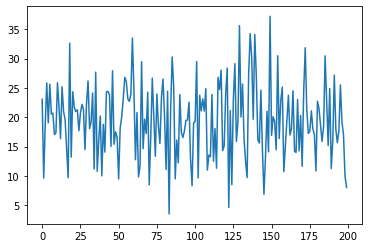

In [90]:
df_temp['temperaturas'].plot()

In [91]:
AR_ts = AutoReg(endog=df_temp['temperaturas'], lags=2).fit()
AR_ts.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           temperaturas   No. Observations:                  200
Model:                     AutoReg(2)   Log Likelihood                -642.950
Method:               Conditional MLE   S.D. of innovations              6.223
Date:                Wed, 25 May 2022   AIC                              3.697
Time:                        16:42:14   BIC                              3.763
Sample:                             2   HQIC                             3.724
                                  200                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          21.5381      2.088     10.313      0.000      17.445      25.631
temperaturas.L1    -0.0481      0.071     -0.675      0.499      -0.188       0.091
temperaturas.L2    -0.0529      0.072     -0.739      0.460      -0.193       0.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4543           -4.3234j            4.3472           -0.2667
AR.2           -0.4543           +4.3234j            4.3472            0.2667
-----------------------------------------------------------------------------
"""

# Durbin-Watson Test (Teste de Autocorrelação de Durbin-Watson)

In [92]:
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [94]:
autocorr_model = sm.OLS(endog=df['rating'], exog=sm.add_constant(data=df[['points','assists','rebounds']])).fit()
autocorr_model.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\Anaconda_Instalado\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Wed, 25 May 2022   Prob (F-statistic):             0.0995
Time:                        19:34:58   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4716     14.588      4.282      0.005      26.776      98.168
points         1.1193      0.411      2.724      0.034       0.114       2.125
assists        0.8834      1.381      0.640      0.546      -2.495       4.262
rebounds      -0.4278      0.851     -0.503      0.633      -2.510       1.655
==============================================================================
Omnibus:                        2.711   Durbin-Watson:                   2.392
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                0.945
Skew:                          -0.751   Prob(JB):                        0.624
Kurtosis:                       3.115   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(autocorr_model.resid)

2.3920546872335398

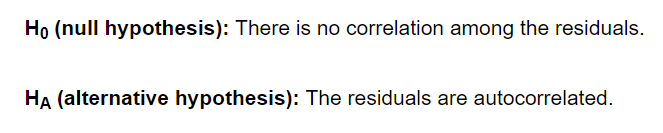

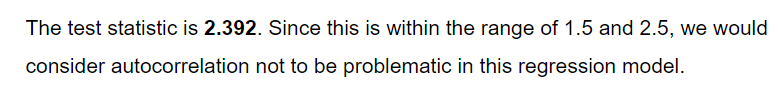

# Correção com Robust Standard Errors

In [109]:
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [111]:
corrected_model = sm.OLS(endog=df['rating'], exog=sm.add_constant(data=df[['points','assists','rebounds']])).fit(cov_type='HAC', cov_kwds={'maxlags':1})
corrected_model.summary()

D:\Anaconda\Anaconda_Instalado\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\Anaconda_Instalado\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     13.34
Date:                Wed, 25 May 2022   Prob (F-statistic):            0.00460
Time:                        20:00:14   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4716      6.851      9.119      0.000      49.045      75.898
points         1.1193      0.184      6.094      0.000       0.759       1.479
assists        0.8834      0.713      1.238      0.216      -0.515       2.282
rebounds      -0.4278      0.305     -1.401      0.161      -1.026       0.171
==============================================================================
Omnibus:                        2.711   Durbin-Watson:                   2.392
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                0.945
Skew:                          -0.751   Prob(JB):                        0.624
Kurtosis:                       3.115   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

# Non-Linear Least Squares (NLS)
Infelizmente não achei função pré-feita desse modelo no statsmodels. Imagino que seja possível a utilização de GLS (generalized least squares), mas não vi isso ainda, então por enquanto paciencia...